In [55]:
# Importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, accuracy_score, recall_score, ConfusionMatrixDisplay

In [56]:
# Defining the column names or features according to the dataset
column_names = ['Date', 'WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8', 'WSR9', 'WSR10','WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19',
'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23',
                'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85', 'HT85', 'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp', 'day'
]
# Reading and importig the dataset with column names
# df = pd.read_csv('onehr.data', names=column_names, dtype=float, converters = {'Date': str})
df = pd.read_csv('onehr.data', names=column_names)

# Data Preprocessing

In [57]:
# viewing the whole dataset
df

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,day
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2532,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2533,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2534,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [58]:
# shape of dataset
df.shape

(2536, 74)

In [59]:
# size of dataset
df.size

187664

In [60]:
df.all()

Date      True
WSR0      True
WSR1      True
WSR2      True
WSR3      True
         ...  
TT        True
SLP       True
SLP_      True
Precp     True
day      False
Length: 74, dtype: bool

In [61]:
# few data from the top of dataset
df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,day
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [62]:
# few data from bottom of dataset
df.tail()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,day
2531,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2532,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2533,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2534,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0
2535,12/31/2004,1.5,1.3,1.8,1.4,1.2,1.7,1.6,1.4,1.6,...,0.54,13.07,9.15,5820,1.95,39.35,10220,-25,0,0.0


In [63]:
#  All information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2536 non-null   object 
 1   WSR0    2536 non-null   object 
 2   WSR1    2536 non-null   object 
 3   WSR2    2536 non-null   object 
 4   WSR3    2536 non-null   object 
 5   WSR4    2536 non-null   object 
 6   WSR5    2536 non-null   object 
 7   WSR6    2536 non-null   object 
 8   WSR7    2536 non-null   object 
 9   WSR8    2536 non-null   object 
 10  WSR9    2536 non-null   object 
 11  WSR10   2536 non-null   object 
 12  WSR11   2536 non-null   object 
 13  WSR12   2536 non-null   object 
 14  WSR13   2536 non-null   object 
 15  WSR14   2536 non-null   object 
 16  WSR15   2536 non-null   object 
 17  WSR16   2536 non-null   object 
 18  WSR17   2536 non-null   object 
 19  WSR18   2536 non-null   object 
 20  WSR19   2536 non-null   object 
 21  WSR20   2536 non-null   object 
 22  

# Missing Value Handling

In [64]:
# missing value is represented as ? in the dataset
# Replacing ? with NaN 
df = df.replace(r'?', np.NaN)

In [65]:
# Converting all the feature columns into numeric-> Float values
for i in column_names[1:]:
    df[i] = df[i].astype(float)

In [66]:
df

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,day
0,1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0.0
2532,12/28/2004,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0.0
2533,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0.0
2534,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,...,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05,0.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2536 non-null   object 
 1   WSR0    2237 non-null   float64
 2   WSR1    2244 non-null   float64
 3   WSR2    2242 non-null   float64
 4   WSR3    2244 non-null   float64
 5   WSR4    2243 non-null   float64
 6   WSR5    2244 non-null   float64
 7   WSR6    2245 non-null   float64
 8   WSR7    2247 non-null   float64
 9   WSR8    2246 non-null   float64
 10  WSR9    2249 non-null   float64
 11  WSR10   2248 non-null   float64
 12  WSR11   2244 non-null   float64
 13  WSR12   2249 non-null   float64
 14  WSR13   2248 non-null   float64
 15  WSR14   2248 non-null   float64
 16  WSR15   2250 non-null   float64
 17  WSR16   2252 non-null   float64
 18  WSR17   2253 non-null   float64
 19  WSR18   2250 non-null   float64
 20  WSR19   2244 non-null   float64
 21  WSR20   2242 non-null   float64
 22  

In [68]:
# Converting our dependent variable day to integer
df['day'] = df['day'].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2536 non-null   object 
 1   WSR0    2237 non-null   float64
 2   WSR1    2244 non-null   float64
 3   WSR2    2242 non-null   float64
 4   WSR3    2244 non-null   float64
 5   WSR4    2243 non-null   float64
 6   WSR5    2244 non-null   float64
 7   WSR6    2245 non-null   float64
 8   WSR7    2247 non-null   float64
 9   WSR8    2246 non-null   float64
 10  WSR9    2249 non-null   float64
 11  WSR10   2248 non-null   float64
 12  WSR11   2244 non-null   float64
 13  WSR12   2249 non-null   float64
 14  WSR13   2248 non-null   float64
 15  WSR14   2248 non-null   float64
 16  WSR15   2250 non-null   float64
 17  WSR16   2252 non-null   float64
 18  WSR17   2253 non-null   float64
 19  WSR18   2250 non-null   float64
 20  WSR19   2244 non-null   float64
 21  WSR20   2242 non-null   float64
 22  

In [70]:
# Dataset describtion with count, mean, standard deviation, minimun and maximum
df.describe()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,day
count,2237.000000,2244.000000,2242.000000,2244.000000,2243.000000,2244.000000,2245.000000,2247.000000,2246.000000,2249.000000,...,2411.000000,2326.000000,2326.000000,2424.000000,2400.000000,2411.000000,2441.000000,2377.000000,2534.000000,2536.000000
mean,1.641261,1.587433,1.546610,1.527273,1.523094,1.542914,1.638218,2.048331,2.540472,2.848599,...,0.304670,9.867313,0.831892,5818.898515,10.510812,37.388366,10164.180664,-0.130416,0.371732,0.028785
std,1.272409,1.267106,1.240039,1.205569,1.198725,1.172245,1.161654,1.160724,1.185858,1.221205,...,0.249057,9.529023,7.352745,79.197400,20.709820,11.227096,52.410976,35.824873,1.317480,0.167236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,0.010000,-14.920000,-25.990000,5480.000000,-56.700000,-10.100000,9975.000000,-135.000000,0.000000,0.000000
25%,0.600000,0.600000,0.600000,0.600000,0.600000,0.700000,0.800000,1.200000,1.700000,2.000000,...,0.090000,2.460000,-3.785000,5770.000000,-3.525000,32.275000,10130.000000,-20.000000,0.000000,0.000000
50%,1.300000,1.300000,1.200000,1.300000,1.300000,1.300000,1.400000,1.900000,2.500000,2.800000,...,0.230000,9.225000,0.360000,5835.000000,14.900000,41.100000,10160.000000,0.000000,0.000000,0.000000
75%,2.400000,2.300000,2.200000,2.200000,2.200000,2.100000,2.200000,2.800000,3.300000,3.700000,...,0.470000,16.710000,4.882500,5880.000000,28.350000,45.100000,10195.000000,15.000000,0.050000,0.000000
max,7.500000,7.700000,7.100000,7.300000,7.200000,7.400000,7.400000,7.500000,9.200000,8.500000,...,1.000000,42.360000,30.420000,5965.000000,42.050000,59.150000,10350.000000,140.000000,20.650000,1.000000


In [71]:
# checking for null or NaN values
null_values_count = list(df.isnull().sum())
print(null_values_count)

[0, 299, 292, 294, 292, 293, 292, 291, 289, 290, 287, 288, 292, 287, 288, 288, 286, 284, 283, 286, 292, 294, 293, 300, 297, 273, 273, 190, 185, 187, 184, 184, 183, 183, 183, 185, 185, 188, 192, 189, 191, 192, 187, 184, 182, 184, 188, 189, 185, 192, 189, 175, 175, 99, 105, 180, 180, 95, 107, 115, 157, 157, 100, 115, 125, 210, 210, 112, 136, 125, 95, 159, 2, 0]


In [72]:
# Storing the column names in features
features = df.columns
features

Index(['Date', 'WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7',
       'WSR8', 'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15',
       'WSR16', 'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21', 'WSR22', 'WSR23',
       'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7',
       'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17',
       'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85',
       'U85', 'V85', 'HT85', 'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50',
       'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp',
       'day'],
      dtype='object')

# Going with imputation using mean values of each feature column

In [73]:
for f in features[1:]:
    # getting the mean value of the feature column
    replace_mean = df[f].mean()    
    # replacing the null values with mean value
    df[f] = df[f].fillna(replace_mean)

In [74]:
# checking for null or NaN values
null_values_count = list(df.isnull().sum())
print(null_values_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [75]:
df

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,day
0,1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.60000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,0.30467,9.867313,0.831892,5818.898515,10.510812,37.388366,10164.180664,-0.130416,0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.000000,65.000000,0.00,0
2532,12/28/2004,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.000000,15.000000,0.00,0
2533,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.000000,-35.000000,0.00,0
2534,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,...,0.25000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.000000,-30.000000,0.05,0


In [76]:
# Checking for duplicate values
df.duplicated().sum()

0

# Feature Selection and Feature Pruning

In [77]:
# calculating correlation between the features
cormat = df.corr()
round(cormat, 2)

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,day
WSR0,1.00,0.92,0.86,0.80,0.75,0.70,0.66,0.60,0.54,0.50,...,0.12,0.21,0.32,-0.15,0.10,0.15,-0.12,-0.11,0.09,-0.12
WSR1,0.92,1.00,0.92,0.85,0.80,0.75,0.71,0.64,0.58,0.52,...,0.11,0.22,0.32,-0.16,0.09,0.14,-0.10,-0.10,0.10,-0.12
WSR2,0.86,0.92,1.00,0.92,0.85,0.79,0.75,0.67,0.61,0.56,...,0.10,0.25,0.33,-0.19,0.08,0.13,-0.09,-0.11,0.10,-0.13
WSR3,0.80,0.85,0.92,1.00,0.91,0.85,0.79,0.71,0.63,0.57,...,0.10,0.26,0.33,-0.21,0.07,0.12,-0.09,-0.11,0.10,-0.13
WSR4,0.75,0.80,0.85,0.91,1.00,0.91,0.84,0.73,0.63,0.56,...,0.10,0.25,0.32,-0.21,0.07,0.11,-0.07,-0.10,0.12,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TT,0.15,0.14,0.13,0.12,0.11,0.10,0.11,0.14,0.08,-0.02,...,0.36,-0.24,0.22,0.25,0.86,1.00,-0.53,-0.28,0.15,0.02
SLP,-0.12,-0.10,-0.09,-0.09,-0.07,-0.07,-0.09,-0.14,-0.12,-0.05,...,-0.15,0.14,-0.25,-0.08,-0.48,-0.53,1.00,0.33,-0.10,-0.05
SLP_,-0.11,-0.10,-0.11,-0.11,-0.10,-0.09,-0.09,-0.10,-0.06,-0.05,...,-0.12,0.08,-0.18,-0.02,-0.24,-0.28,0.33,1.00,-0.09,-0.01
Precp,0.09,0.10,0.10,0.10,0.12,0.12,0.11,0.07,0.02,-0.04,...,0.21,0.01,0.21,0.02,0.20,0.15,-0.10,-0.09,1.00,-0.04


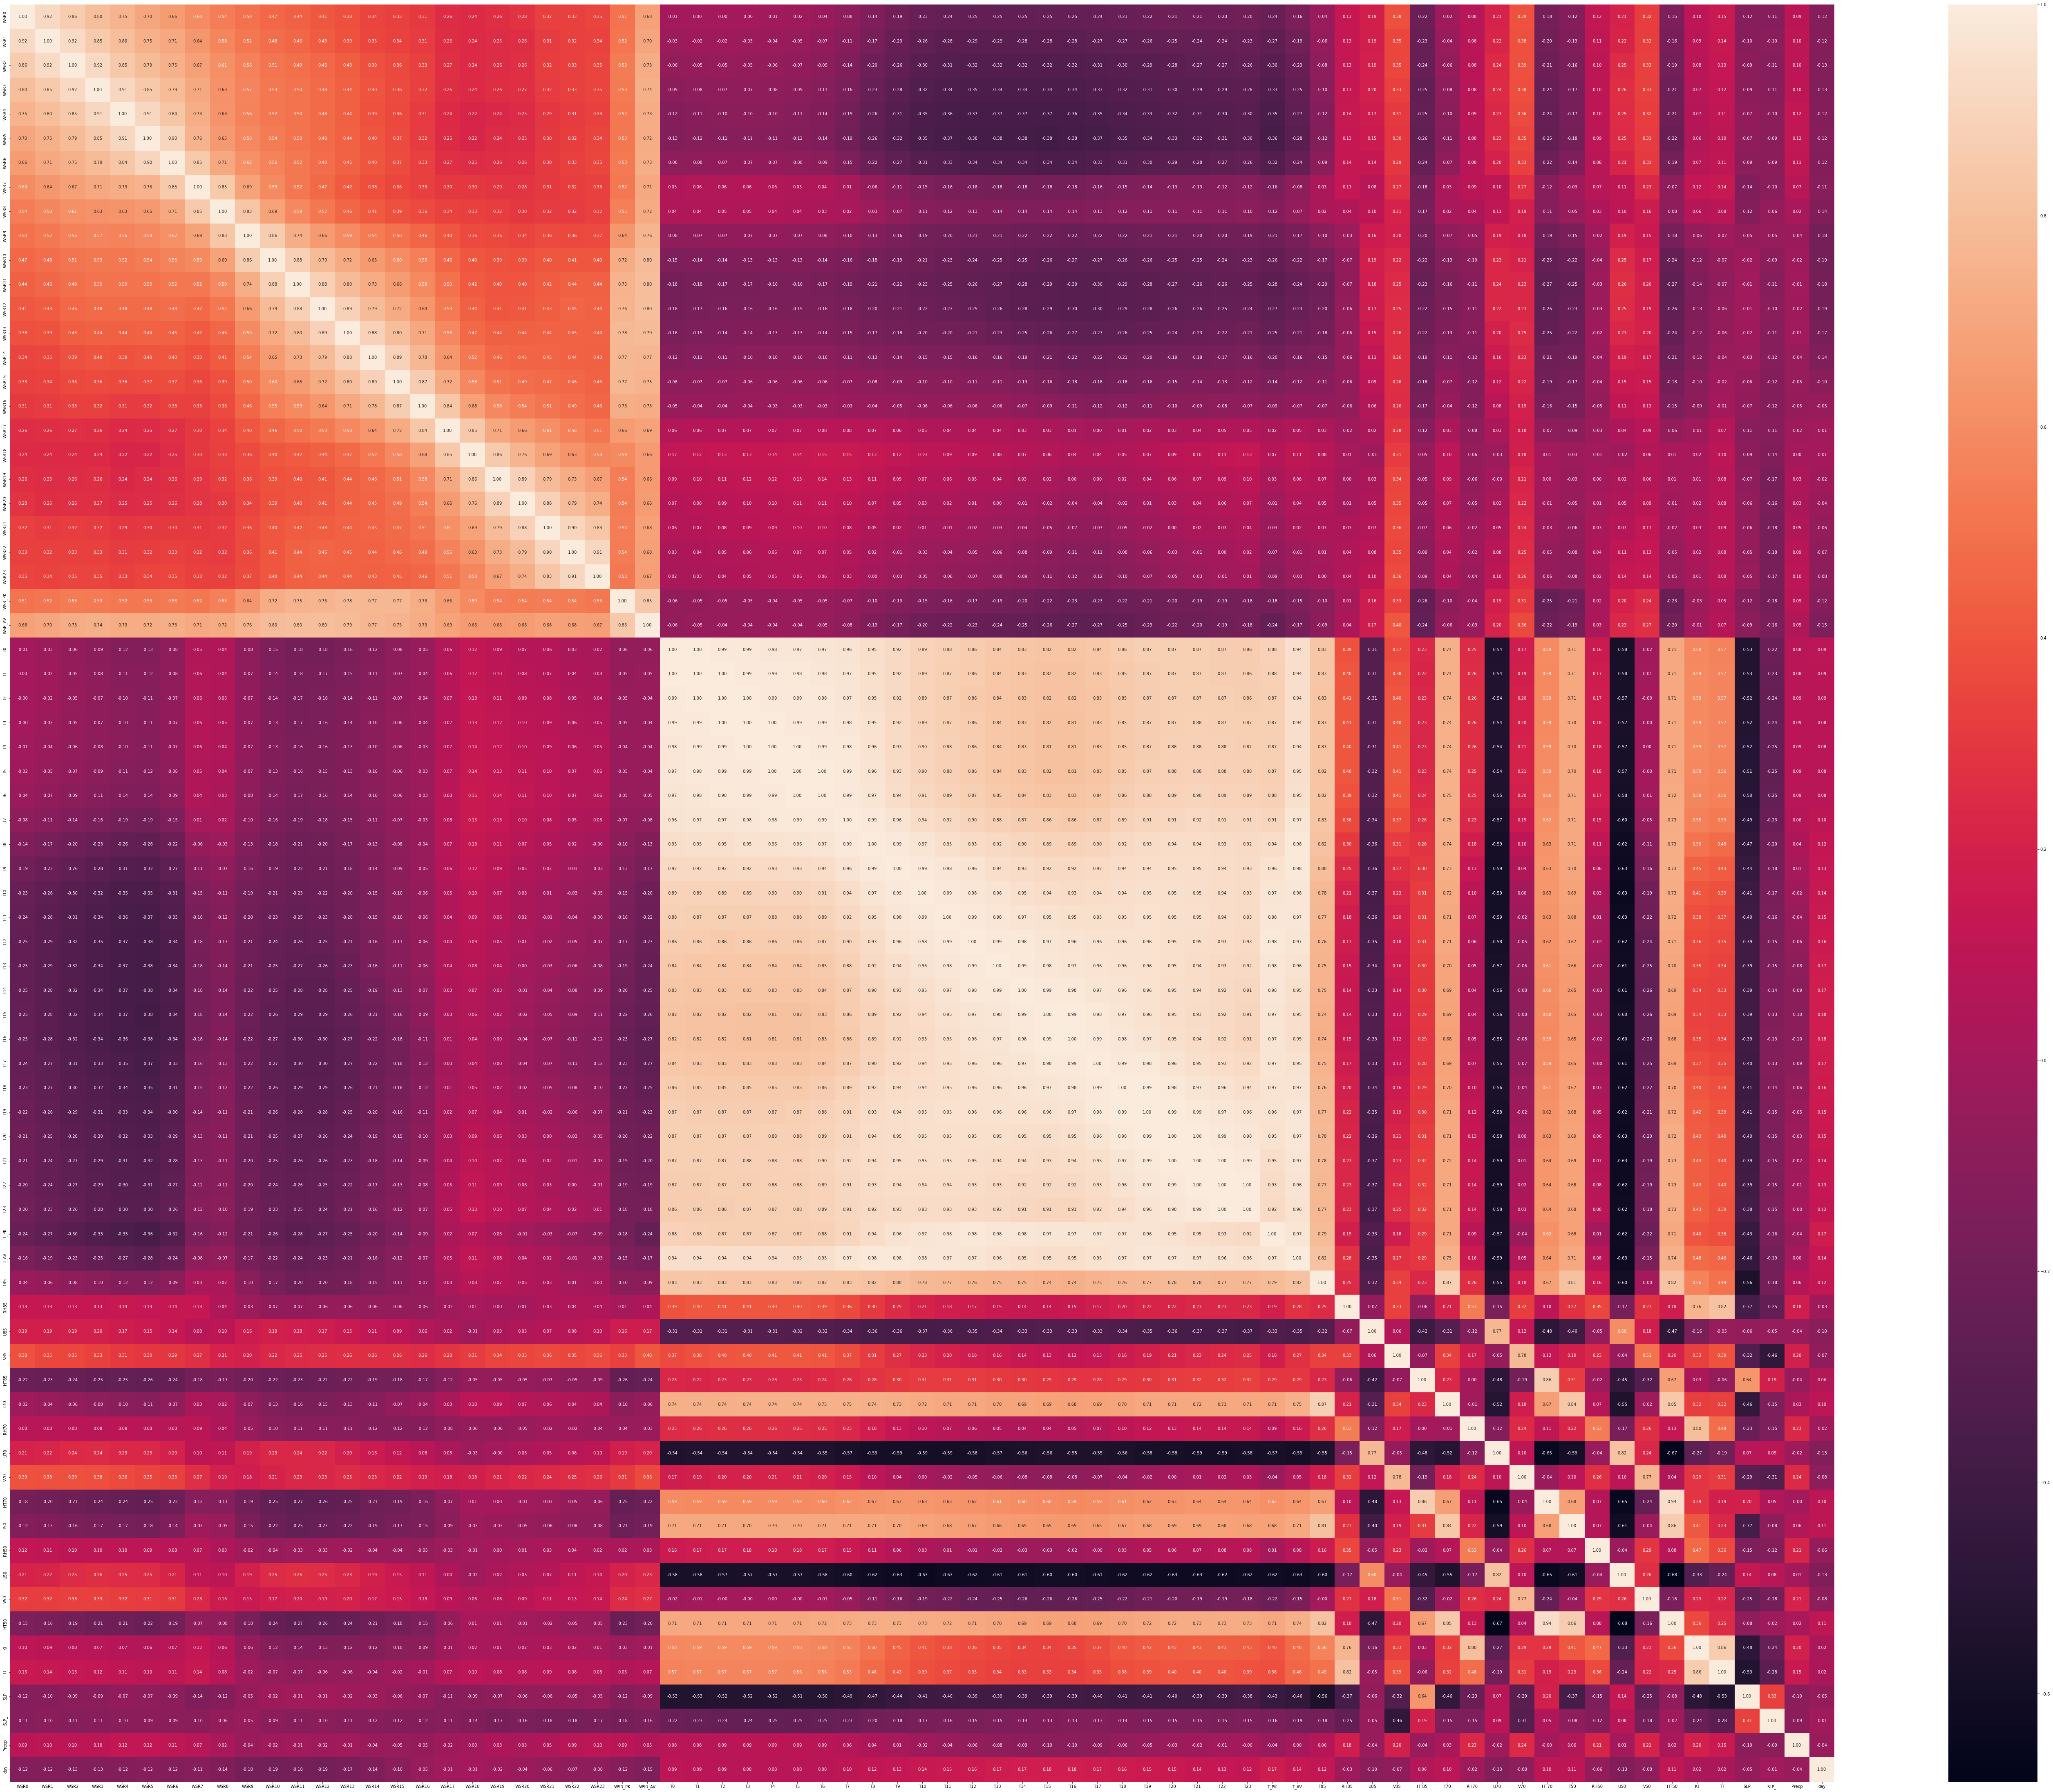

In [78]:
# Displaying the heatmap of correlation between the features
fig, ax = plt.subplots(figsize = (100,80))

ax = sns.heatmap(cormat, annot = True, fmt='.2f')

In [79]:
# Selecting features based on the Heatmap
# Keeping the threshold on 16%(inclusive) correlation with the target variable 
temp_selected_features = ['T_PK', 'T18', 'T17', 'T16', 'T15', 'T14', 'T13', 'T12']
selected_features = temp_selected_features
selected_features.append('day')

In [80]:
df = df[selected_features]
df

,T_PK,T18,T17,T16,T15,T14,T13,T12,day
0,19.1,16.8,17.3,18.3,18.9,19.1,18.9,18.3,0
1,22.4,18.1,19.1,20.8,22.1,22.4,21.8,21.2,0
2,22.2,18.6,19.8,21.3,22.2,22.1,22.0,21.8,0
3,19.6,18.6,18.8,18.9,19.2,19.6,19.4,19.3,0
4,26.0,22.9,24.2,25.6,26.0,25.8,25.1,23.8,0
...,...,...,...,...,...,...,...,...,...
2531,14.8,11.3,12.9,14.2,14.8,14.7,14.5,13.9,0
2532,18.4,15.4,15.8,16.9,17.6,18.3,18.4,17.9,0
2533,20.6,18.2,18.9,20.0,20.6,19.9,20.6,20.4,0
2534,23.6,21.1,21.8,22.6,23.5,23.6,23.3,21.9,0


# Data Normalization

In [81]:
# Data normalization
def normalization_data(train):
    min_value = min(train)
    max_value = max(train)
    
    new_data = []
    for ea in train:
        new_value = (ea - min_value)/(max_value - min_value)
        new_data.append(round(new_value, 2))
    return new_data

In [82]:
# Normalizing the dataset
for i in df.columns:
    df[i] = normalization_data(df[i])
# Dataset after normalization
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_7448\1173973885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = normalization_data(df[i])


,T_PK,T18,T17,T16,T15,T14,T13,T12,day
0,0.44,0.45,0.44,0.44,0.43,0.44,0.45,0.45,0.0
1,0.52,0.48,0.49,0.50,0.52,0.52,0.52,0.52,0.0
2,0.51,0.49,0.50,0.51,0.52,0.51,0.52,0.54,0.0
3,0.45,0.49,0.48,0.45,0.44,0.45,0.46,0.47,0.0
4,0.61,0.61,0.61,0.62,0.61,0.61,0.60,0.59,0.0
...,...,...,...,...,...,...,...,...,...
2531,0.33,0.30,0.33,0.34,0.33,0.33,0.34,0.34,0.0
2532,0.42,0.41,0.40,0.40,0.40,0.42,0.43,0.44,0.0
2533,0.47,0.48,0.48,0.48,0.48,0.46,0.49,0.50,0.0
2534,0.55,0.56,0.55,0.54,0.55,0.55,0.55,0.54,0.0


# Random split of data as a test and training set using Python

In [83]:
# Shuffling of data
df = df.sample(frac=1)
df

,T_PK,T18,T17,T16,T15,T14,T13,T12,day
1153,0.41,0.42,0.42,0.41,0.40,0.41,0.42,0.42,0.0
1166,0.56,0.53,0.55,0.55,0.54,0.56,0.57,0.57,0.0
2086,0.69,0.68,0.67,0.68,0.70,0.70,0.70,0.71,0.0
2178,0.36,0.34,0.36,0.37,0.36,0.37,0.36,0.34,0.0
1054,0.46,0.44,0.43,0.44,0.46,0.46,0.48,0.46,0.0
...,...,...,...,...,...,...,...,...,...
2257,0.61,0.63,0.63,0.61,0.59,0.61,0.62,0.65,0.0
225,0.78,0.77,0.78,0.75,0.71,0.68,0.67,0.72,0.0
1403,0.56,0.57,0.56,0.55,0.55,0.57,0.58,0.59,0.0
2078,0.57,0.59,0.60,0.59,0.57,0.56,0.56,0.56,0.0


In [84]:
# splitting of training and testing data
# 70% => training data and 30% => testing data
separating_index = int(len(df)*0.7)
train_data = df[:separating_index]
test_data = df[separating_index:]

In [85]:
train_data

,T_PK,T18,T17,T16,T15,T14,T13,T12,day
1153,0.41,0.42,0.42,0.41,0.40,0.41,0.42,0.42,0.0
1166,0.56,0.53,0.55,0.55,0.54,0.56,0.57,0.57,0.0
2086,0.69,0.68,0.67,0.68,0.70,0.70,0.70,0.71,0.0
2178,0.36,0.34,0.36,0.37,0.36,0.37,0.36,0.34,0.0
1054,0.46,0.44,0.43,0.44,0.46,0.46,0.48,0.46,0.0
...,...,...,...,...,...,...,...,...,...
107,0.32,0.38,0.37,0.33,0.32,0.31,0.33,0.34,0.0
631,0.74,0.77,0.77,0.75,0.75,0.74,0.74,0.76,0.0
857,0.70,0.74,0.72,0.70,0.70,0.70,0.70,0.72,0.0
1937,0.61,0.61,0.61,0.63,0.61,0.61,0.63,0.64,0.0


In [86]:
test_data

,T_PK,T18,T17,T16,T15,T14,T13,T12,day
2207,0.29,0.31,0.34,0.31,0.28,0.26,0.25,0.24,0.0
992,0.68,0.66,0.70,0.69,0.68,0.68,0.67,0.67,0.0
2521,0.33,0.37,0.37,0.35,0.33,0.33,0.32,0.32,0.0
1992,0.76,0.78,0.77,0.74,0.70,0.68,0.77,0.79,0.0
936,0.81,0.81,0.79,0.76,0.77,0.81,0.81,0.81,0.0
...,...,...,...,...,...,...,...,...,...
2257,0.61,0.63,0.63,0.61,0.59,0.61,0.62,0.65,0.0
225,0.78,0.77,0.78,0.75,0.71,0.68,0.67,0.72,0.0
1403,0.56,0.57,0.56,0.55,0.55,0.57,0.58,0.59,0.0
2078,0.57,0.59,0.60,0.59,0.57,0.56,0.56,0.56,0.0


In [87]:
# separating the data into dependent and independent(target) variables
y_train = train_data['day']
y_test  = test_data['day']
X_train = train_data[temp_selected_features]
X_test  = test_data[temp_selected_features]


In [88]:
# converting the splitted dataset into dataframe
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

In [89]:
X_train

,T_PK,T18,T17,T16,T15,T14,T13,T12,day
1153,0.41,0.42,0.42,0.41,0.40,0.41,0.42,0.42,0.0
1166,0.56,0.53,0.55,0.55,0.54,0.56,0.57,0.57,0.0
2086,0.69,0.68,0.67,0.68,0.70,0.70,0.70,0.71,0.0
2178,0.36,0.34,0.36,0.37,0.36,0.37,0.36,0.34,0.0
1054,0.46,0.44,0.43,0.44,0.46,0.46,0.48,0.46,0.0
...,...,...,...,...,...,...,...,...,...
107,0.32,0.38,0.37,0.33,0.32,0.31,0.33,0.34,0.0
631,0.74,0.77,0.77,0.75,0.75,0.74,0.74,0.76,0.0
857,0.70,0.74,0.72,0.70,0.70,0.70,0.70,0.72,0.0
1937,0.61,0.61,0.61,0.63,0.61,0.61,0.63,0.64,0.0


In [90]:
y_train

,day
1153,0.0
1166,0.0
2086,0.0
2178,0.0
1054,0.0
...,...
107,0.0
631,0.0
857,0.0
1937,0.0


In [91]:
X_test

,T_PK,T18,T17,T16,T15,T14,T13,T12,day
2207,0.29,0.31,0.34,0.31,0.28,0.26,0.25,0.24,0.0
992,0.68,0.66,0.70,0.69,0.68,0.68,0.67,0.67,0.0
2521,0.33,0.37,0.37,0.35,0.33,0.33,0.32,0.32,0.0
1992,0.76,0.78,0.77,0.74,0.70,0.68,0.77,0.79,0.0
936,0.81,0.81,0.79,0.76,0.77,0.81,0.81,0.81,0.0
...,...,...,...,...,...,...,...,...,...
2257,0.61,0.63,0.63,0.61,0.59,0.61,0.62,0.65,0.0
225,0.78,0.77,0.78,0.75,0.71,0.68,0.67,0.72,0.0
1403,0.56,0.57,0.56,0.55,0.55,0.57,0.58,0.59,0.0
2078,0.57,0.59,0.60,0.59,0.57,0.56,0.56,0.56,0.0


In [92]:
y_test

,day
2207,0.0
992,0.0
2521,0.0
1992,0.0
936,0.0
...,...
2257,0.0
225,0.0
1403,0.0
2078,0.0


In [93]:
y_test.value_counts()

day
0.0    736
1.0     25
dtype: int64

# Supervised Learning

As this dataset has a target variable with only two categories of 0 and 1, we can use binary classification technique. 
I have used Logistic regression algorithm from scikitlearn Library.

In [94]:
# Model Training
# Logistic Regression Model from scikitlearn library
classifier_model = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
# Predicting the results of the test set
y_pred_test = classifier_model.predict(X_test)
# Predicting the results of the train set
y_pred_train = classifier_model.predict(X_train)

In [96]:
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.value_counts()

0.0    736
1.0     25
dtype: int64

In [97]:
y_test.value_counts()

day
0.0    736
1.0     25
dtype: int64

In [98]:
# accuracy score of the model with train dataset
acc = accuracy_score(y_train, y_pred_train)
print("Accuracy Score: %0.2f%%"%(acc*100))

Accuracy Score: 100.00%


In [99]:
# accuracy score of the model with test dataset
acc = accuracy_score(y_test, y_pred_test)
print("Accuracy Score: %0.2f%%"%(acc*100))

Accuracy Score: 100.00%


In [100]:
cm = confusion_matrix(y_test, y_pred_test)
print("confusion matrix: ", cm)

confusion matrix:  [[736   0]
 [  0  25]]


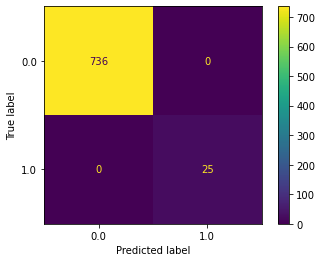

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       736
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00       761
   macro avg       1.00      1.00      1.00       761
weighted avg       1.00      1.00      1.00       761



In [101]:
# Confusion matrix 
ConfusionMatrixDisplay.from_estimator(classifier_model, X_test, y_test)
plt.show()

# Classification report
cr = classification_report(y_test, y_pred_test)
print("Classification Report: \n", cr)